<a href="https://colab.research.google.com/github/riteshgupta614/Hackathon/blob/riteshgupta614-patch-1/Click_Through_Rate_(CTR)_of_an_email_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [4]:
#importing data
train = pd.read_csv('train_F3fUq2S.csv')

pd.set_option('display.max_columns', None)

train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,3,29,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,3,23,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,4,24,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,3,31,0,0,1,0,0,0,0,0,14,0.142826


# Feature engineering

In [5]:
train['times_of_day'].value_counts()

train['times_of_day'] = train['times_of_day'].map({'Morning': 1,'Noon': '2', 'Evening': '3'})

train['times_of_day'] = train['times_of_day'].astype(int)

In [6]:
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,2,6,26,3,29,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,1,2,11,0,22,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,2,2,11,3,23,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,3,15,9,4,24,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,2,6,26,3,31,0,0,1,0,0,0,0,0,14,0.142826


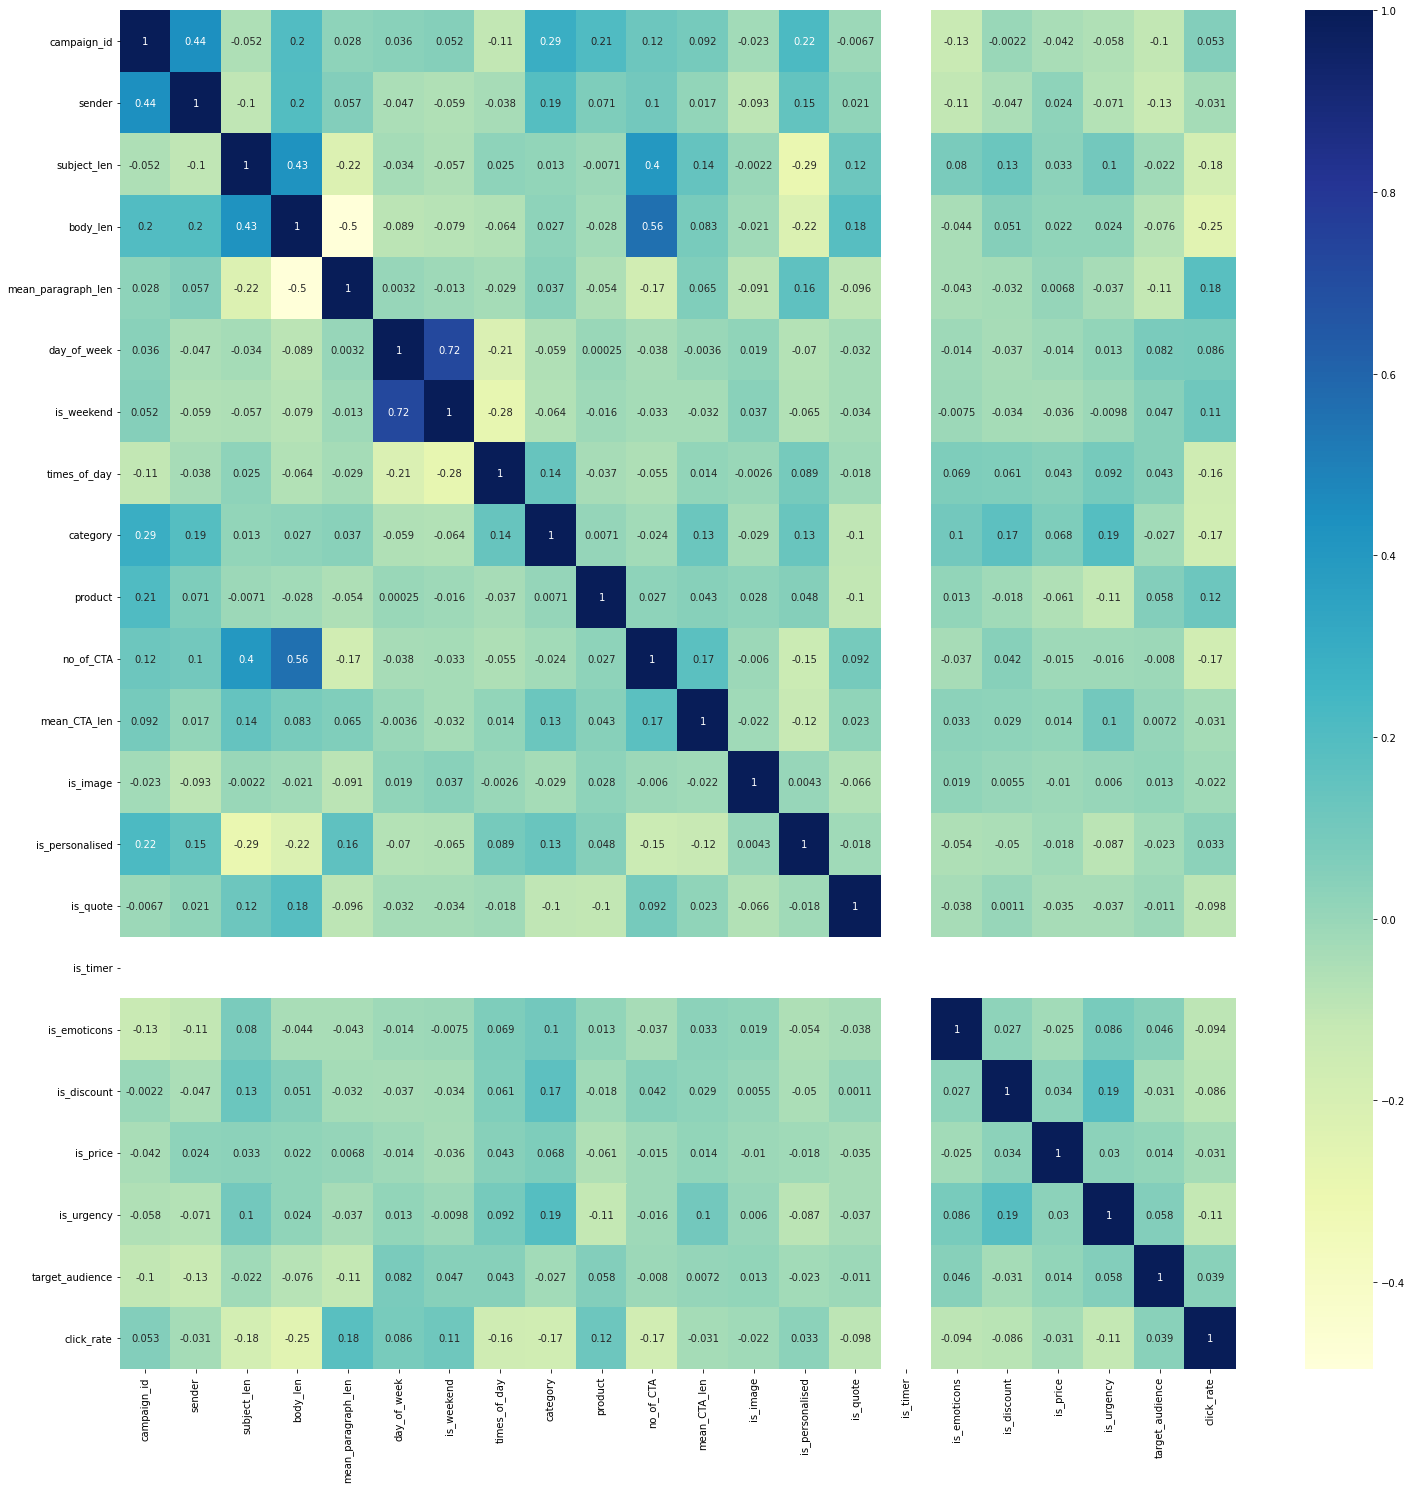

In [7]:
ax = plt.subplots(figsize=(25, 25))
sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)

In [8]:
# checking number of unique values in each column
train.nunique()

campaign_id           1888
sender                  12
subject_len            170
body_len              1568
mean_paragraph_len     121
day_of_week              7
is_weekend               2
times_of_day             3
category                16
product                 43
no_of_CTA               40
mean_CTA_len            79
is_image                 6
is_personalised          2
is_quote                 7
is_timer                 1
is_emoticons             6
is_discount              2
is_price                 8
is_urgency               2
target_audience         17
click_rate            1810
dtype: int64

In [9]:
'''

#Cheaking Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
'''

'\n\n#Cheaking Multicollinearity\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\ndef calc_vif(X):\n\n    # Calculating VIF\n    vif = pd.DataFrame()\n    vif["variables"] = X.columns\n    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\n\n    return(vif)\n'

In [10]:
# calc_vif(x)

# Test train Split

In [11]:
X = train.drop(['campaign_id','click_rate'],axis=1)

X.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,3,76,10439,39,5,1,2,6,26,3,29,0,0,0,0,0,0,0,0,14
1,3,54,2570,256,5,1,1,2,11,0,22,0,0,0,0,0,0,0,0,10
2,3,59,12801,16,5,1,2,2,11,3,23,1,0,1,0,0,0,0,0,16
3,3,74,11037,30,4,0,3,15,9,4,24,0,0,0,0,0,0,0,0,10
4,3,80,10011,27,5,1,2,6,26,3,31,0,0,1,0,0,0,0,0,14


In [12]:
y = train['click_rate']

y.head()

0    0.103079
1    0.700000
2    0.002769
3    0.010868
4    0.142826
Name: click_rate, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [14]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [15]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

# Trail models

Linear Regression - Comented because poor r2 result compared to other Models

In [16]:
'''

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

'''


'\n\nlin_reg = LinearRegression()\nlin_reg.fit(X_train, y_train)\npredictions = lin_reg.predict(X_test)\n\nmae, mse, rmse, r_squared = evaluation(y_test, predictions)\nprint("MAE:", mae)\nprint("MSE:", mse)\nprint("RMSE:", rmse)\nprint("R2 Score:", r_squared)\nprint("-"*30)\nrmse_cross_val = rmse_cv(lin_reg)\nprint("RMSE Cross-Validation:", rmse_cross_val)\n\nnew_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}\nmodels = models.append(new_row, ignore_index=True)\n\n'

Ridge Regression - Comented because poor r2 result compared to other Models

In [17]:
'''

ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)


'''

'\n\nridge = Ridge()\nridge.fit(X_train, y_train)\npredictions = ridge.predict(X_test)\n\nmae, mse, rmse, r_squared = evaluation(y_test, predictions)\nprint("MAE:", mae)\nprint("MSE:", mse)\nprint("RMSE:", rmse)\nprint("R2 Score:", r_squared)\nprint("-"*30)\nrmse_cross_val = rmse_cv(ridge)\nprint("RMSE Cross-Validation:", rmse_cross_val)\n\nnew_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}\nmodels = models.append(new_row, ignore_index=True)\n\n\n'

Lasso Regression - Comented because poor r2 result compared to other Models

In [18]:
'''

lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)


'''

'\n\nlasso = Lasso()\nlasso.fit(X_train, y_train)\npredictions = lasso.predict(X_test)\n\nmae, mse, rmse, r_squared = evaluation(y_test, predictions)\nprint("MAE:", mae)\nprint("MSE:", mse)\nprint("RMSE:", rmse)\nprint("R2 Score:", r_squared)\nprint("-"*30)\nrmse_cross_val = rmse_cv(lasso)\nprint("RMSE Cross-Validation:", rmse_cross_val)\n\nnew_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}\nmodels = models.append(new_row, ignore_index=True)\n\n\n'

Elastic Net - Comented because poor r2 result compared to other Models 

In [19]:
'''

elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

'''

'\n\nelastic_net = ElasticNet()\nelastic_net.fit(X_train, y_train)\npredictions = elastic_net.predict(X_test)\n\nmae, mse, rmse, r_squared = evaluation(y_test, predictions)\nprint("MAE:", mae)\nprint("MSE:", mse)\nprint("RMSE:", rmse)\nprint("R2 Score:", r_squared)\nprint("-"*30)\nrmse_cross_val = rmse_cv(elastic_net)\nprint("RMSE Cross-Validation:", rmse_cross_val)\n\nnew_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}\nmodels = models.append(new_row, ignore_index=True)\n\n'

Support Vector Machines - Comented because poor r2 result compared to other Models 

In [20]:
'''svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

'''

'svr = SVR(C=100000)\nsvr.fit(X_train, y_train)\npredictions = svr.predict(X_test)\n\nmae, mse, rmse, r_squared = evaluation(y_test, predictions)\nprint("MAE:", mae)\nprint("MSE:", mse)\nprint("RMSE:", rmse)\nprint("R2 Score:", r_squared)\nprint("-"*30)\nrmse_cross_val = rmse_cv(svr)\nprint("RMSE Cross-Validation:", rmse_cross_val)\n\nnew_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}\nmodels = models.append(new_row, ignore_index=True)\n\n'

Random Forest Regressor - Comented because poor r2 result compared to other Models

In [21]:
'''
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)


cv_scores = cross_val_score(random_forest, X_train, y_train, cv=5,scoring= 'r2')
cv_scores.mean()

'''

'\nrandom_forest = RandomForestRegressor(n_estimators=100)\nrandom_forest.fit(X_train, y_train)\npredictions = random_forest.predict(X_test)\n\nmae, mse, rmse, r_squared = evaluation(y_test, predictions)\nprint("MAE:", mae)\nprint("MSE:", mse)\nprint("RMSE:", rmse)\nprint("R2 Score:", r_squared)\n\n\ncv_scores = cross_val_score(random_forest, X_train, y_train, cv=5,scoring= \'r2\')\ncv_scores.mean()\n\n'

XGBoost Regressor - Comented because poor r2 result compared to other Models

In [22]:
'''

xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
'''

'\n\nxgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)\nxgb.fit(X_train, y_train)\npredictions = xgb.predict(X_test)\n\nmae, mse, rmse, r_squared = evaluation(y_test, predictions)\nprint("MAE:", mae)\nprint("MSE:", mse)\nprint("RMSE:", rmse)\nprint("R2 Score:", r_squared)\n'

In [23]:
'''

from sklearn.linear_model import SGDRegressor
sgd= SGDRegressor(max_iter= 10000, epsilon= 0.0002, loss="squared_loss")

#fiting the model
sgd.fit(X_train, y_train)

y_pred_sgd = sgd.predict(X_test)


mae, mse, rmse, r_squared = evaluation(y_test, y_pred_sgd)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

#cross validation score
cv_scores = cross_val_score(random_forest, X_train, y_train, cv=5,scoring= 'r2')
cv_scores.mean()

'''

'\n\nfrom sklearn.linear_model import SGDRegressor\nsgd= SGDRegressor(max_iter= 10000, epsilon= 0.0002, loss="squared_loss")\n\n#fiting the model\nsgd.fit(X_train, y_train)\n\ny_pred_sgd = sgd.predict(X_test)\n\n\nmae, mse, rmse, r_squared = evaluation(y_test, y_pred_sgd)\nprint("MAE:", mae)\nprint("MSE:", mse)\nprint("RMSE:", rmse)\nprint("R2 Score:", r_squared)\n\n#cross validation score\ncv_scores = cross_val_score(random_forest, X_train, y_train, cv=5,scoring= \'r2\')\ncv_scores.mean()\n\n'

Decision Tree - with hyperpatameters Comented because poor r2 result compared to other Models


In [24]:

from sklearn.tree import DecisionTreeRegressor
# dt1 = DecisionTreeRegressor()

# from sklearn.model_selection import GridSearchCV


# parameters = {"max_depth" : (100,120,150,),
#               "max_features" : ("auto","sqrt","log2"),
#               "max_leaf_nodes" : (3,4,5),
#               "min_samples_split" : (4,6,8,10),
#               "min_samples_leaf" : (2,3,4,5,6)}

# dt_grid = GridSearchCV(dt1 , param_grid=parameters,refit=True, n_jobs=-1,cv=10,verbose=2)
# dt_grid

# # fitting the model
# dt_grid.fit(X_train,y_train)

# #predicting y
# y_pred_dt = dt_grid.predict(X_test)


# mae, mse, rmse, r_squared = evaluation(y_test, y_pred_dt)
# print("MAE:", mae)
# print("MSE:", mse)
# print("RMSE:", rmse)
# print("R2 Score:", r_squared)

# #cross validation score
# cv_scores = cross_val_score(random_forest, X_train, y_train, cv=5,scoring= 'r2')
# cv_scores.mean()



Random Forest - with hyperpatameters Comented because poor r2 result compared to other Models


In [25]:
# from sklearn.ensemble import RandomForestRegressor

# regf = RandomForestRegressor()
  
# regf_params = {"n_estimators":(10,20,30),
#                 'max_depth':(2,3,5),
#                 'min_samples_split':[3,5,7],
#                 'min_samples_leaf':[2,4],
#                 'max_features':['auto','sqrt']}
# rf_GS = GridSearchCV(estimator=regf ,param_grid=regf_params,n_jobs=-1,cv=5,verbose=2)
# rf_GS
# # fitting the model
# rf_GS.fit(X_train,y_train)
# #predicting y
# y_pred_rf = rf_GS.predict(X_test)


# mae, mse, rmse, r_squared = evaluation(y_test, y_pred_rf)
# print("MAE:", mae)
# print("MSE:", mse)
# print("RMSE:", rmse)
# print("R2 Score:", r_squared)

# #cross validation score
# cv_scores = cross_val_score(random_forest, X_train, y_train, cv=5,scoring= 'r2')
# cv_scores.mean()


AdaBoostRegressor Comented because poor r2 result compared to other Models

In [26]:
# from sklearn.ensemble import AdaBoostRegressor
# ada_boost = AdaBoostRegressor(learning_rate=0.15,random_state =85, n_estimators=100)
# # fitting data
# ada_boost.fit(X_train,y_train)

# #Predicting value
# y_pred_ada = ada_boost.predict(X_test)

# mae, mse, rmse, r_squared = evaluation(y_test, y_pred_ada)
# print("MAE:", mae)
# print("MSE:", mse)
# print("RMSE:", rmse)
# print("R2 Score:", r_squared)

# #cross validation score
# cv_scores = cross_val_score(random_forest, X_train, y_train, cv=5,scoring= 'r2')
# cv_scores.mean()


In [27]:
# from sklearn.model_selection import GridSearchCV

In [28]:
   
# xgb = XGBRegressor()   
# regf_params = {'n_estimators': randint(50, 400),
#               'learning_rate': uniform(0.01, 0.59),
#               'subsample': uniform(0.3, 0.6),
#               'max_depth': [3, 4, 5, 6, 7, 8, 9],
#               'colsample_bytree': uniform(0.5, 0.4),
#               'min_child_weight': [1, 2, 3, 4] }
# rf_GS = GridSearchCV(estimator=xgb ,param_grid=regf_params,n_jobs=-1,cv=5,verbose=2)
# rf_GS
# # fitting the model
# rf_GS.fit(X_train,y_train)
# #predicting y
# y_pred_rf = rf_GS.predict(X_test)


# mae, mse, rmse, r_squared = evaluation(y_test, y_pred_rf)
# print("MAE:", mae)
# print("MSE:", mse)
# print("RMSE:", rmse)
# print("R2 Score:", r_squared)

# #cross validation score
# cv_scores = cross_val_score(random_forest, X_train, y_train, cv=5,scoring= 'r2')
# cv_scores.mean()

In [29]:
# from sklearn.ensemble import AdaBoostRegressor
# search_grid = {'loss': 'exponential',
#                'n_estimators': [300,350,420,450],               
#                'max_depth': [3, 4, 5, 6, 7, 8, 9,10,11,12]}
               
               


In [30]:
# ada_boost = AdaBoostRegressor(base_estimator = DecisionTreeRegressor, param_grid=search_grid, random_state=1)


# ridge = Ridge()
# parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
# ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)



# Final Model - AdaBoostRegressor  with DecisionTreeRegressor as a base_estimator

In [31]:
from sklearn.ensemble import AdaBoostRegressor
ada_boost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=1.25,n_estimators=400, random_state=1)


# fitting data
ada_boost.fit(X_train,y_train)

#Predicting value
y_pred_ada = ada_boost.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred_ada)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

#cross validation score
cv_scores = cross_val_score(ada_boost, X_train, y_train, cv=5,scoring= 'r2')
cv_scores.mean()


MAE: 0.02434599292103183
MSE: 0.0015920989669838698
RMSE: 0.039901114858909265
R2 Score: 0.6401999103062741


0.47149978254139224

In [32]:
test = pd.read_csv('test_Bk2wfZ3.csv')
test.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,3,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,0,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,0,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,2,40,0,0,0,0,0,0,0,0,14


In [33]:
test['times_of_day'] = test['times_of_day'].map({'Morning': 1,'Noon': '2', 'Evening': '3'})

test['times_of_day'] = test['times_of_day'].astype(int)

test = test.drop(['campaign_id'],axis=1)

In [34]:
test.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,3,61,12871,11,6,1,2,6,26,3,37,1,0,0,0,1,0,0,0,14
1,3,54,2569,256,5,1,1,2,11,0,22,0,0,0,0,0,0,0,0,10
2,3,88,1473,78,4,0,3,2,11,0,22,1,0,1,0,0,0,0,0,10
3,3,88,1473,78,3,0,3,2,11,0,22,1,0,1,0,0,0,0,0,10
4,3,78,9020,29,3,0,2,6,26,2,40,0,0,0,0,0,0,0,0,14


In [35]:
y_pred = ada_boost.predict(test)

In [36]:
2+2

4

In [37]:
y_pred[:5]

array([0.04735667, 0.7       , 0.12857143, 0.12857143, 0.12282561])

In [38]:
df = pd.DataFrame(y_pred,columns=['click_rate'])
df.head()

,click_rate
0,0.047357
1,0.700000
2,0.128571
3,0.128571
4,0.122826


In [39]:
sol=pd.read_csv('sample_submission_LJ2N3ZQ.csv')
sol.head()

FileNotFoundError: ignored

In [ ]:
sol['click_rate']=df['click_rate']
sol.head()

In [ ]:
sol.to_csv('./submission.csv',index=False)